# Captcha Solver - Navia Life Care Assignment

In [1]:
import os
import os.path
import cv2
import glob
import imutils

In [2]:
import matplotlib.pyplot as plt

In [3]:
cv2.__version__

'4.5.1'

## Input training images

In [4]:
CAPTCHA_IMAGE_FOLDER  = r"C:\Users\Piyush\Desktop\Navia Life - Assignement\My_outputfiles\Assignment\electoral-tagged"

In [5]:
captcha_files = glob.glob(os.path.join(CAPTCHA_IMAGE_FOLDER,'*'))
counts = {}

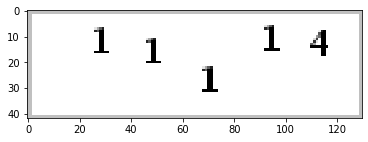

In [6]:
# printing a random captcha 
captcha = captcha_files[0]
for i in range(1):
    sample_image = cv2.imread(captcha)
    plt.imshow(sample_image)

## Break the captcha to individual numbers separately

### Store all the separated number images in some output folder

In [7]:
OUTPUT_FOLDER = r"C:\Users\Piyush\Desktop\Navia Life - Assignement\My_outputfiles\Assignment\Output_letter_images"

In [8]:
for (i, captcha) in enumerate(captcha_files):
    print("Processing image {}/{}".format(i + 1, len(captcha_files))) 

    # grab the base filename as the text i.e only captcha for e.g '11235'
    filename = os.path.basename(captcha)
    captcha_text = os.path.splitext(filename)[0]
    
    # Load the image and convert it to grayscale for dimensional reduction, reducing complexity!
    img = cv2.imread(captcha)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding  the image - different technqiues possible
    # (converts it to pure black and white i.e binary) used for separating an object considered as a foreground from its 
    # background.  we change the pixels of an image to make the image easier to analyze
    # 1. thresh = cv2.threshold(gray, 140, 255,cv2.THRESH_BINARY)[1]   # nothing happens
    # 2. thresh = cv2.threshold(gray, 100, 255,cv2.THRESH_BINARY_INV)[1] # we had to check manually by trial and error threshold value
    # 3. thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)[1]  # nothing happens
    thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )[1]  # automatically finds threshold value 
    
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # finds contours of image
    contours = contours[0]   # Our all separated numbers are present in this contour
    #print(len(contours))     # tells us that there are 5 contours detected for 5 numbers
    
    digits = []
    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)          # Get the rectangle that contains the contour
        digits.append((x, y, w, h))                   # Normal contour with single number only
    
    if len(digits) != 5:        # If we found more or less than 5 letters in the captcha, bad training so skip it!
        continue
    # Sort the detected letter images based on the x coordinate to make sure we are processing them from left-to-right so we 
    # match the right image with the right digit    
    digits = sorted(digits, key=lambda x: x[0])
    
    # Saving out each separate number as a single image
    for digit_box, digit_text in zip(digits, captcha_text):
        x, y, w, h = digit_box                               # Grab the coordinates of the letter in the image
        digit_image = gray[y - 2:y + h + 2, x - 2:x + w + 2] #Extract the letter from the original image with a 2-pixel margin 
        save_path = os.path.join(OUTPUT_FOLDER, digit_text)  # Get the folder to save the image in

        # in case output directory does not exist, create it
        if not os.path.exists(save_path):
            os.makedirs(save_path)

        # write the letter image to a file
        count = counts.get(digit_text, 1)
        p = os.path.join(save_path, "{}.png".format(str(count).zfill(6)))
        cv2.imwrite(p, digit_image)
        counts[digit_text] = count + 1    # increment the count for the current key

Processing image 1/940
Processing image 2/940
Processing image 3/940
Processing image 4/940
Processing image 5/940
Processing image 6/940
Processing image 7/940
Processing image 8/940
Processing image 9/940
Processing image 10/940
Processing image 11/940
Processing image 12/940
Processing image 13/940
Processing image 14/940
Processing image 15/940
Processing image 16/940
Processing image 17/940
Processing image 18/940
Processing image 19/940
Processing image 20/940
Processing image 21/940
Processing image 22/940
Processing image 23/940
Processing image 24/940
Processing image 25/940
Processing image 26/940
Processing image 27/940
Processing image 28/940
Processing image 29/940
Processing image 30/940
Processing image 31/940
Processing image 32/940
Processing image 33/940
Processing image 34/940
Processing image 35/940
Processing image 36/940
Processing image 37/940
Processing image 38/940
Processing image 39/940
Processing image 40/940
Processing image 41/940
Processing image 42/940
P

In [9]:
print(counts)   # tells the count of each indivial number in all captchas combines

{'1': 520, '4': 531, '3': 518, '6': 520, '7': 529, '2': 511, '5': 535, '8': 524, '9': 521}


In [10]:
import os.path
import numpy as np
from imutils import paths
from keras.layers import Dropout
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

Using TensorFlow backend.
C:\Users\Piyush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Piyush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Piyush\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Piyush\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [11]:
# resize our image to desired width and height

def resize_to_fit(image, width, height):
    # grab the dimensions of the image, then initialize the padding values
    (h, w) = image.shape[:2]
    if w > h:
        image = imutils.resize(image, width=width)              # resize along the width
    else:
        image = imutils.resize(image, height=height)            # resize along the height

    # determine the padding values for the width and height to obtain the target dimensions
    padW = int((width - image.shape[1]) / 2.0)
    padH = int((height - image.shape[0]) / 2.0)

    # pad the image then apply one more resizing to handle any rounding issues
    image = cv2.copyMakeBorder(image, padH, padH, padW, padW,cv2.BORDER_REPLICATE)
    image = cv2.resize(image, (width, height))

    return image

## Creating our X ( input image) and Y (output label/class)

In [12]:
img_list = []
X = []
Y = []
i = 0
# loop over the input images - broken digit images
for image_file in paths.list_images(OUTPUT_FOLDER ):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_file)
    img_list.append(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = resize_to_fit(image, 20, 20)      # Resize the letter so it fits in a desired 20x20 pixel box
    image = np.expand_dims(image, axis=2)     # Add a third channel dimension so that keras easily trains the model
    label = image_file.split(os.path.sep)[-2] # Grab the name of the letter based on the folder it was in
    i = i + 1;
    # Add the letter image and it's label to our training data
    X.append(image)
    Y.append(label)
print(i)  # tells total numbers

4700


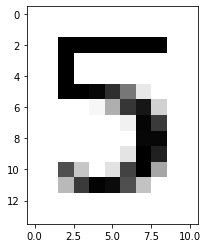

In [13]:
plt.imshow(img_list[2428])

In [14]:
# Normalization
X = np.array(X, dtype="float") / 255.0
Y = np.array(Y)

In [15]:
print(X.shape)
print(Y.shape)

(4700, 20, 20, 1)
(4700,)


## Creating our CNN model

In [16]:
# Split the training data into separate train and test sets
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.33, random_state=42)

In [17]:
# Convert the labels (digits) into one-hot encodings that Keras can work with since it is multiclass
lb = LabelBinarizer().fit(Y_train)
Y_train = lb.transform(Y_train)
Y_test = lb.transform(Y_test)

In [23]:
# Build the neural network!
model = Sequential()

# First convolutional layer with ( Note: (20,20,1) is the 20*20 pixel we have converted all our numbers to)
model.add(Conv2D(filters = 20, kernel_size = (5, 5),activation="relu", input_shape=(20, 20, 1) ))
# adding the first pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# add regularization
model.add(Dropout(0.3))
# Second convolutional layer 
model.add(Conv2D(filters = 50, kernel_size = (5, 5), activation="relu"))
# second pooling layer
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# add regularization
model.add(Dropout(0.3))
model.add(Flatten())
# add the first fully-connected-Hidden layer with 500 nodes
model.add(Dense(500, activation="relu"))
# add the second fully-connected-layer
model.add(Dense(250, activation="relu"))

# Output layer with 9 nodes (one for each possible digit we predict)
model.add(Dense(9, activation="softmax"))

# Ask Keras to build the TensorFlow model behind the scenes
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the neural network
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, epochs=10, verbose=1)

Train on 3149 samples, validate on 1551 samples
Epoch 1/10
3149/3149 [==============================] - 2s 730us/step - loss: 0.6957 - accuracy: 0.7799 - val_loss: 0.0300 - val_accuracy: 0.9974
Epoch 2/10
3149/3149 [==============================] - 2s 566us/step - loss: 0.0238 - accuracy: 0.9987 - val_loss: 0.0306 - val_accuracy: 0.9974
Epoch 3/10
3149/3149 [==============================] - 2s 504us/step - loss: 0.0194 - accuracy: 0.9987 - val_loss: 0.0312 - val_accuracy: 0.9974
Epoch 4/10
3149/3149 [==============================] - 2s 603us/step - loss: 0.0148 - accuracy: 0.9987 - val_loss: 0.0325 - val_accuracy: 0.9974
Epoch 5/10
3149/3149 [==============================] - 2s 681us/step - loss: 0.0147 - accuracy: 0.9987 - val_loss: 0.0309 - val_accuracy: 0.9974
Epoch 6/10
3149/3149 [==============================] - 2s 525us/step - loss: 0.0133 - accuracy: 0.9987 - val_loss: 0.0353 - val_accuracy: 0.9974
Epoch 7/10
3149/3149 [==============================] - 2s 610us/step - loss

### Excellent accuracy of 99.8% on the validation test set!!

## Testing with test captcha images

In [19]:
TEST_IMAGES = r"C:\Users\Piyush\Desktop\Navia Life - Assignement\My_outputfiles\Assignment\electoral-captchas"
from imutils import paths

PREDICTED CAPTCHA text is: 36856
PREDICTED CAPTCHA text is: 72789
PREDICTED CAPTCHA text is: 87993
PREDICTED CAPTCHA text is: 67885
PREDICTED CAPTCHA text is: 94931
PREDICTED CAPTCHA text is: 91379
PREDICTED CAPTCHA text is: 89762
PREDICTED CAPTCHA text is: 16957
PREDICTED CAPTCHA text is: 89612
PREDICTED CAPTCHA text is: 98251


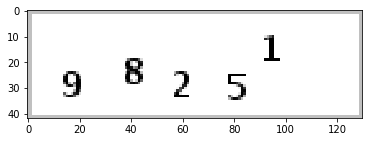

In [20]:
# Grab some random CAPTCHA images to test against.
captcha_image_files = list(paths.list_images(TEST_IMAGES))
# choose 10 or your own choice of any random test images or comment it to take all as input test images
captcha_image_files = np.random.choice(captcha_image_files, size=(10,), replace=False)

# loop over the image paths and breaking them into individual numbers as done for training captchas
for captcha in captcha_image_files:
    # Doimg same preprocessing as done for training captcha images
    image = cv2.imread(captcha)
    plt.imshow(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = contours[0]   
    
    digits = []
    for cnt in contours:
        (x, y, w, h) = cv2.boundingRect(cnt)          
        digits.append((x, y, w, h))             
    
    if len(digits) != 5:       
        continue
        
    
    digits = sorted(digits, key=lambda x: x[0])  # sorting numbers according to thier x coordinate
 

    # Create an output image and a list to hold our predicted letters
    output = cv2.merge([image] * 3)  # takes single channel image and combines it to make a multi-channel say RGB image
    predictions = []

    # loop over the digits
    i=0
    for digit_bounding_box in digits:
        x, y, w, h = digit_bounding_box
        digit_image = image[y - 2:y + h + 2, x - 2:x + w + 2]
        digit_image = resize_to_fit(digit_image, 20, 20)   # Re-size the letter image to 20x20 pixels to match training data

        # Turn the single image into a 4d list of images for keras model
        digit_image = np.expand_dims(digit_image, axis=2)
        digit_image = np.expand_dims(digit_image, axis=0)
        # prediction
        prediction = model.predict(digit_image)
        # Convert the one-hot-encoded prediction back to a normal letter
        digit = lb.inverse_transform(prediction)[0]
        predictions.append(digit)
        # draw the prediction on the output image
        cv2.rectangle(output, (x - 2, y - 2), (x + w + 4, y + h + 4), (0, 255, 0), 1) 
        cv2.putText(output, digit, (x - 5, y - 5), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX, 0.55, (255, 0, 0), 2)

    # Print the captcha's text
    captcha_text = "".join(predictions)   # combines all the predicted digits to form the captcha
    print("PREDICTED CAPTCHA text is: {}".format(captcha_text))

     #Show the annotated image
    cv2.imshow("Output", output)
    cv2.waitKey(0)
    

### Press any key on keyboard to get 10 continous captcha predictions
### The image shown above is for last input captcha